In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from __future__ import print_function

In [9]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348L, 62L, 47L)


In [25]:
faces.target

array([1, 3, 3, ..., 7, 3, 5], dtype=int64)

#### Lets plot some of the images to get and idea of data we are working with

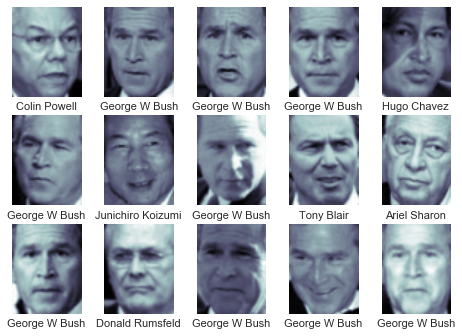

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### Each image is of size [62,47], keeping each  pixel as a feature is not coputationaly wise, Using PCA to find the features that includes maximum variance of the data.

Using n_componenets = 150


In [40]:
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [33]:
train_test_split?

#### Lets split the data for training and test using train_test_split

In [42]:
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data,
                                                faces.target,
                                                test_size=.33,
                                                random_state=42
                                               )

#### One of main hyperparameters of SVM is "C", to find best C, consequently the best model, grid_search can be used.

In [43]:
from sklearn.grid_search import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)

Wall time: 19.8 s


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('randomizedpca', RandomizedPCA(copy=True, iterated_power=3, n_components=150, random_state=42,
       whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': [0.0001, 0.0005, 0.001, 0.005], 'svc__C': [1, 5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


#### Lets see what values we got from grid search

In [44]:
grid.best_params_

{'svc__C': 5, 'svc__gamma': 0.001}

#### Now we have got our model trained with hyperparameters C=5 and gamma=0.001, predict target values on Xtest data

In [45]:
model = grid.best_estimator_
y_pred = model.predict(Xtest)


#### Now its time to evaluete the model accuracy(ie how well it is predicting the target values on test data)
We wil use the following methods
1. accuracy_score
2. classification_score
3. confusion_matrix


In [51]:
from sklearn.metrics import classification_report
print(classification_report(ytest,
                            y_pred,
                            target_names=faces.target_names
                           ))
    

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.75      0.70        20
     Colin Powell       0.82      0.89      0.85        91
  Donald Rumsfeld       0.65      0.88      0.75        41
    George W Bush       0.94      0.82      0.87       165
Gerhard Schroeder       0.76      0.87      0.81        30
      Hugo Chavez       0.90      0.66      0.76        29
Junichiro Koizumi       0.89      0.94      0.91        17
       Tony Blair       0.80      0.79      0.80        52

      avg / total       0.84      0.83      0.83       445



#### what we can conclude from above classification report,
1. Higher precison and higher recall for a target class is good. *George W Bush* and *Junichiro Koizumi* are having top precison and recall score.
2. f1-score is combined measure of precision and recall, 
\begin{align}
\ f1score & = 2*(precison * recall) / (precision + recall) 
\end{align}



In [55]:
from sklearn.metrics import accuracy_score
print("Accuracy Score {}".format(accuracy_score(y_pred, ytest)))

Accuracy Score 0.829213483146


C:\Anaconda3\lib\site-packages\seaborn\matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
C:\Anaconda3\lib\site-packages\seaborn\matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


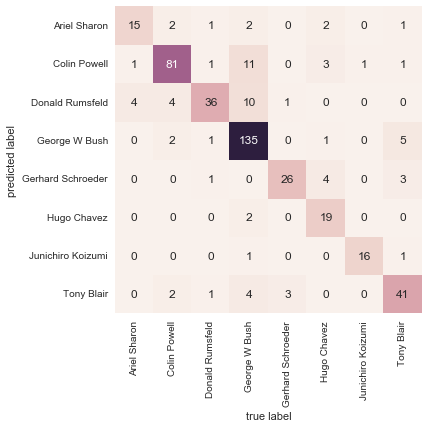

In [57]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');